 - https://stackoverflow.com/questions/77337434/calculating-the-area-of-a-2d-kde-plot
 - https://math.stackexchange.com/questions/1019452/finding-the-area-of-a-implicit-relation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.integrate import dblquad, quad, simpson
from scipy.misc import derivative

import numdifftools as nd

In [2]:
def model(x, y):
    return x**2 + y**2 #+ np.sin(4*x) + np.sin(4*y)

In [3]:
def f(x,y): 
    return float(model(x,y) < 1)

In [4]:
dblquad(f, -1.1, 1.1, lambda x: -1.1, lambda x: 1.1)

/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadpack_py.py:1151: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


(3.1415969233967287, 0.00017773655771676945)

In [5]:
delta = 0.0025
x = np.arange(-1.1, 1.1, delta)
y = np.arange(-1.1, 1.1, delta)
X, Y = np.meshgrid(x, y)

Z = model(X, Y)

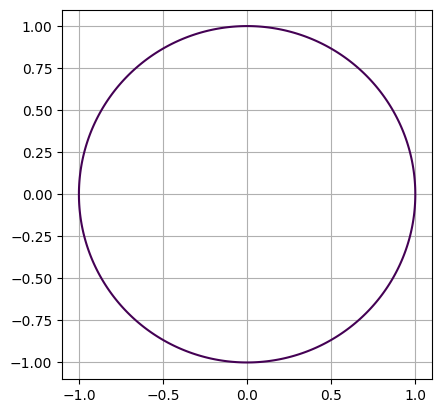

In [6]:
fig, axe = plt.subplots()
contour = axe.contour(X, Y, Z, [1])
axe.set_aspect("equal")
axe.grid()

In [7]:
xy = contour.collections[0].get_paths()[0].vertices

In [8]:
xy.shape

(3201, 2)

In [9]:
t = np.linspace(0, 1, xy.shape[0])
fx = interp1d(t, xy[:, 0], fill_value=xy[0, 0], bounds_error=False, kind='cubic')
fy = interp1d(t, xy[:, 1], fill_value=xy[0, 1], bounds_error=False, kind='cubic')

In [10]:
def green(t):
    return fy(t)*derivative(fx, t, dx=0.001)

In [11]:
quad(green, 0, 1, limit=250)

/tmp/ipykernel_393/3455720752.py:1: IntegrationWarning: The maximum number of subdivisions (250) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad(green, 0, 1, limit=250)


(3.139034540161884, 0.03185013885347132)

In [12]:
def green2(t):
    return fy(t)*nd.Derivative(fx)(t)

In [15]:
quad(green2, 0, 1, limit=250)

/tmp/ipykernel_393/2491704911.py:1: IntegrationWarning: The maximum number of subdivisions (250) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad(green2, 0, 1, limit=250)


(3.1561907306447954, 0.002258374968177712)

In [16]:
simpson(xy[:, 1], x=xy[:, 0])

3.1415893027396815